# Lab: Machine learning  
*Using the cardiovascular disease dataset.*

## EDA

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df = pd.read_csv("../data/cardio.csv", sep=";")
df = df.drop(columns=["id"])

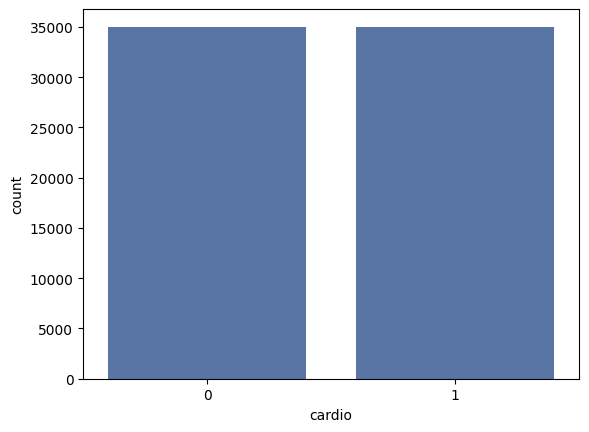

In [187]:
sns.countplot(data=df, x="cardio");

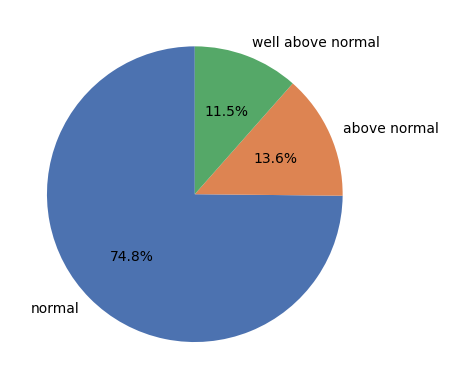

In [188]:
plt.pie(df["cholesterol"].value_counts(), labels=["normal", "above normal", "well above normal"], autopct="%1.1f%%", startangle=90);

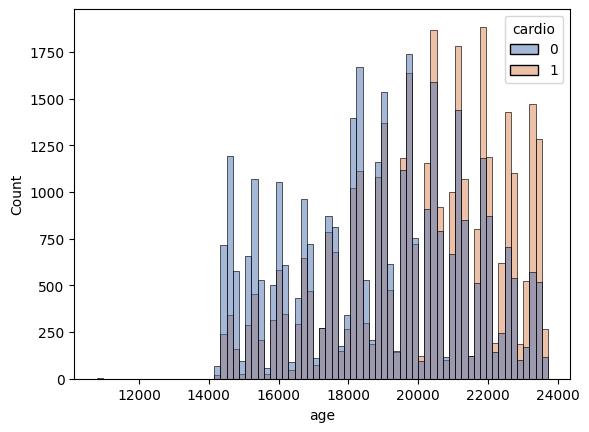

In [189]:
sns.histplot(data=df, x="age", hue="cardio");

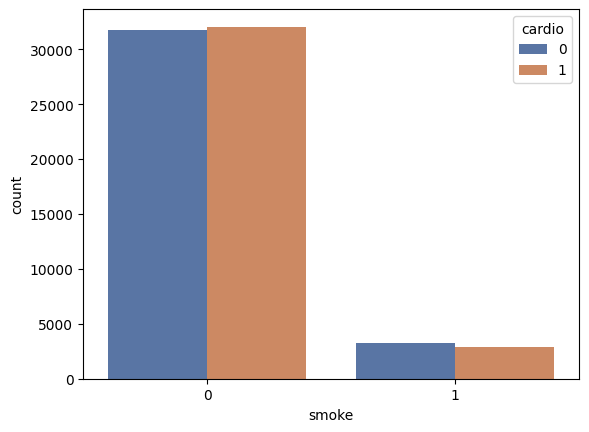

In [190]:
sns.countplot(data=df, x="smoke", hue="cardio");

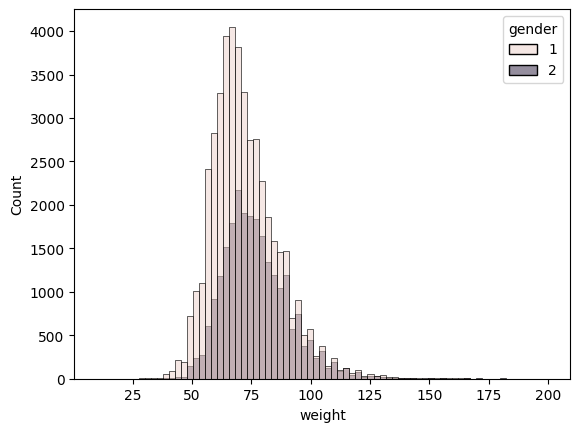

In [191]:
sns.histplot(data=df, x="weight", hue="gender", bins=75);

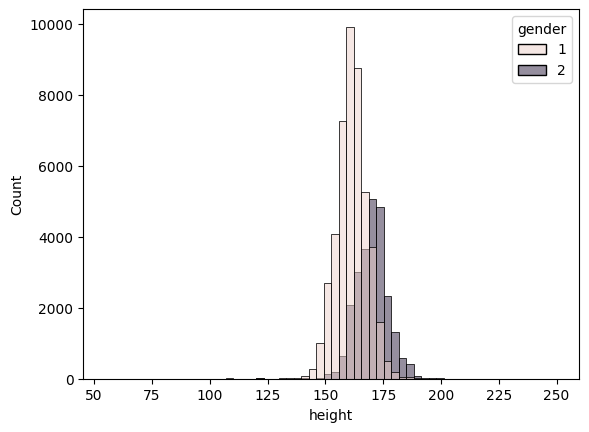

In [192]:
sns.histplot(data=df, x="height", hue="gender", bins=60);

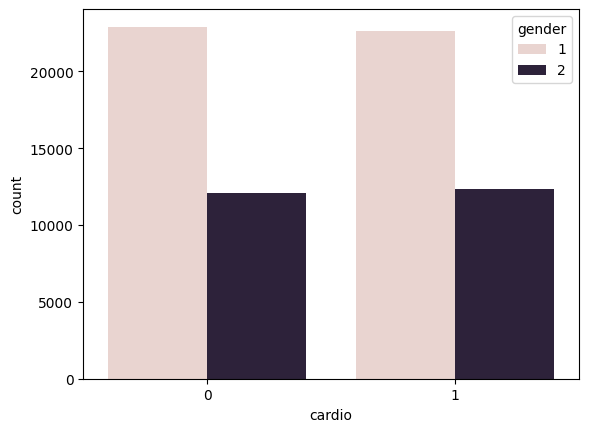

In [193]:
sns.countplot(data=df, x="cardio", hue="gender");

## Feature engineering
### BMI

In [194]:
df["bmi"] = df["weight"] / (df["height"] / 100) ** 2
df["bmi"] = df["bmi"].round(1)
df = df[["age", "gender", "height", "bmi", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]]
df = df[(df["bmi"] > 16) & (df["bmi"] <= 40)]

Då labbinstruktionerna hänvisar till Wikipedia användes de gränsvärden angivna där. Ursprunglig källa anges vara WHO och hänvisar till att människor med värden under 16 är "svårt tunna" medan de med värden över 40 lider av "fetma klass 3". 

In [195]:
df["bmi_cat"] = pd.cut(df["bmi"], bins=[16, 18.5, 25, 30, 35, 40, float("inf")], labels=["underweight", "normal", "overweight", "obese cl1", "obese cl2", "obese cl3"])
df = df[["age", "gender", "height", "bmi", "bmi_cat", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]]

In [196]:
df

,age,gender,height,bmi,bmi_cat,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,22.0,normal,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,34.9,obese cl1,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,23.5,normal,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,28.7,overweight,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,23.0,normal,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,21074,1,165,29.4,overweight,80.0,150,80,1,1,0,0,1,1
69995,19240,2,168,26.9,overweight,76.0,120,80,1,1,1,0,1,0
69997,19066,2,183,31.4,obese cl1,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,27.1,overweight,72.0,135,80,1,2,0,0,0,1


### blodtryck